## Scala's real-world project repository data

In [1]:
import pandas as pd

pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv') 

## Preparing and cleaning the data

In [2]:
pulls = pulls_one.append(pulls_two)

pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

## Merging the DataFrames

In [3]:
data = pulls.merge(pull_files, on='pid')

## Is the project still actively maintained?

c:\users\vova\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='date'>

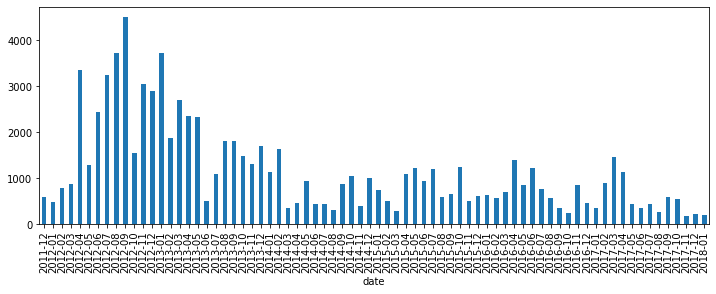

In [4]:
%matplotlib inline

data['month'] = data['date'].dt.month

data['year'] = data['date'].dt.year

counts = data.groupby(data['date'].dt.to_period('M'))['pid'].agg('count')

counts.plot(kind='bar', figsize = (12,4))

## Is there camaraderie in the project?

<AxesSubplot:ylabel='Frequency'>

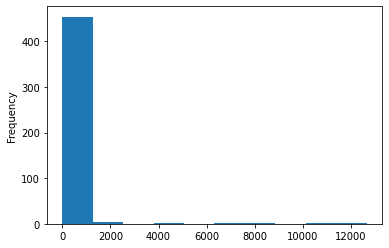

In [5]:
%matplotlib inline

by_user = data.groupby('user')['pid'].agg('count')

by_user.plot(kind='hist')

## What files were changed in the last ten pull requests?

In [6]:
last_10 = pulls.nlargest(10, 'date')

joined_pr = last_10.merge(pull_files, on='pid')

files = set(joined_pr['file'])

files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## Who made the most pull requests to a given file?

In [7]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = data[data['file'] == file]

author_counts = file_pr.groupby('user').count()

author_counts.nlargest(3, 'pid')

pid  date  file  month  year
user                                  
xeno-by    11    11    11     11    11
retronym    5     5     5      5     5
soc         4     4     4      4     4

## Who made the last ten pull requests on a given file?

In [8]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = pull_files[pull_files['file'] == file]

joined_pr = file_pr.merge(pulls, on='pid')

users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## The pull requests of two special developers

<AxesSubplot:xlabel='date'>

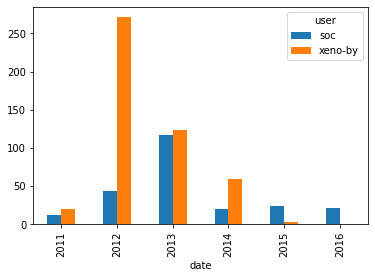

In [9]:
%matplotlib inline

authors = ['xeno-by', 'soc']

by_author = pulls[pulls['user'].isin(authors)]


counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

counts_wide.plot(kind='bar')

## Visualizing the contributions of each developer

<AxesSubplot:xlabel='date'>

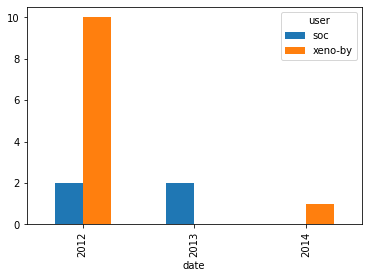

In [10]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

by_author = data[data['user'].isin(authors)]

by_file = by_author[by_author['file'] == file]

grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

by_file_wide.plot(kind='bar')